# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries

from sqlalchemy import create_engine
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load data from database
engine = create_engine('sqlite:///InsertDatabaseName.db')
df = pd.read_sql_table('InsertTableName', 'sqlite:///InsertDatabaseName.db') 
X= df['message']
y = df.drop(['message','original','genre'], axis=1)
print(y)



       related  request  offer  aid_related  medical_help  medical_products  \
0            1        0      0            0             0                 0   
1            1        0      0            1             0                 0   
2            1        0      0            0             0                 0   
3            1        1      0            1             0                 1   
4            1        0      0            0             0                 0   
5            0        0      0            0             0                 0   
6            1        0      0            0             0                 0   
7            1        1      0            1             0                 0   
8            0        0      0            0             0                 0   
9            1        1      0            1             1                 1   
10           1        1      0            1             1                 1   
11           0        0      0            0         

### 2. Write a tokenization function to process your text data

In [3]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens=[]
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    return clean_tokens
tokenize(" Loser boys")

['loser', 'boy']

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [4]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('ifidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [5]:
X_train, X_test, y_train,y_test = train_test_split(X,y)

In [6]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [7]:
y_pred= pipeline.predict(X_test)

related


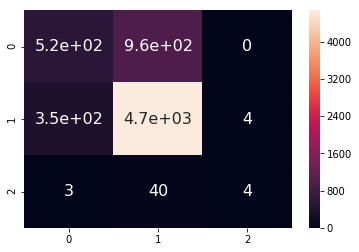

related              precision    recall  f1-score   support

          0       0.60      0.35      0.44      1480
          1       0.82      0.93      0.87      5027
          2       0.50      0.09      0.15        47

avg / total       0.77      0.79      0.77      6554

request


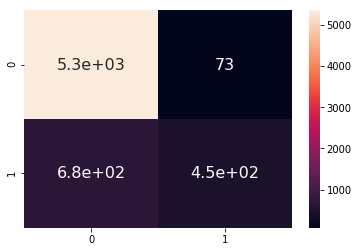

request              precision    recall  f1-score   support

          0       0.89      0.99      0.93      5422
          1       0.86      0.40      0.54      1132

avg / total       0.88      0.88      0.87      6554

offer


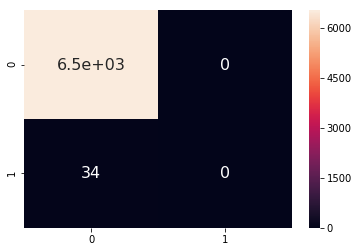

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


offer              precision    recall  f1-score   support

          0       0.99      1.00      1.00      6520
          1       0.00      0.00      0.00        34

avg / total       0.99      0.99      0.99      6554

aid_related


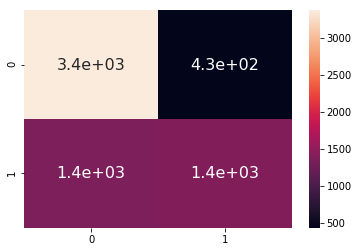

aid_related              precision    recall  f1-score   support

          0       0.71      0.89      0.79      3799
          1       0.76      0.50      0.61      2755

avg / total       0.73      0.73      0.71      6554

medical_help


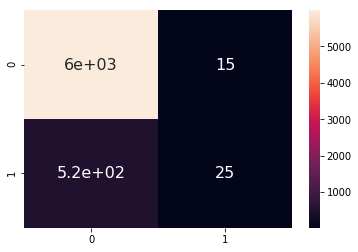

medical_help              precision    recall  f1-score   support

          0       0.92      1.00      0.96      6005
          1       0.62      0.05      0.08       549

avg / total       0.89      0.92      0.88      6554

medical_products


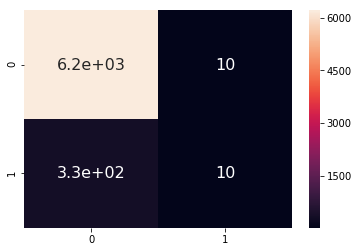

medical_products              precision    recall  f1-score   support

          0       0.95      1.00      0.97      6215
          1       0.50      0.03      0.06       339

avg / total       0.93      0.95      0.93      6554

search_and_rescue


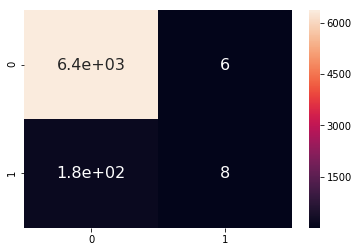

search_and_rescue              precision    recall  f1-score   support

          0       0.97      1.00      0.99      6371
          1       0.57      0.04      0.08       183

avg / total       0.96      0.97      0.96      6554

security


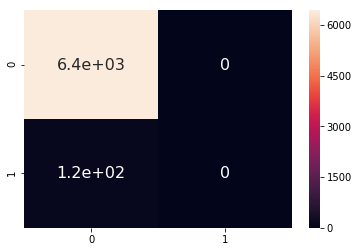

security              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6436
          1       0.00      0.00      0.00       118

avg / total       0.96      0.98      0.97      6554

military


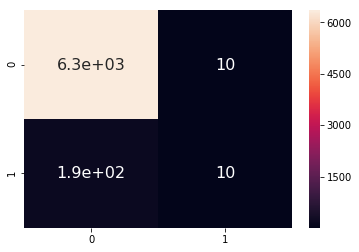

military              precision    recall  f1-score   support

          0       0.97      1.00      0.98      6354
          1       0.50      0.05      0.09       200

avg / total       0.96      0.97      0.96      6554

child_alone


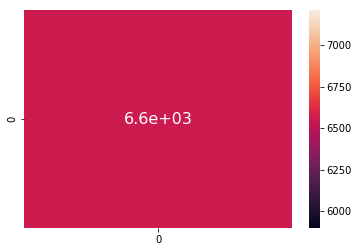

child_alone              precision    recall  f1-score   support

          0       1.00      1.00      1.00      6554

avg / total       1.00      1.00      1.00      6554

water


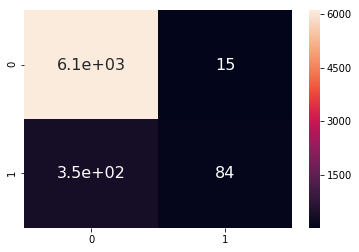

water              precision    recall  f1-score   support

          0       0.95      1.00      0.97      6116
          1       0.85      0.19      0.31       438

avg / total       0.94      0.94      0.93      6554

food


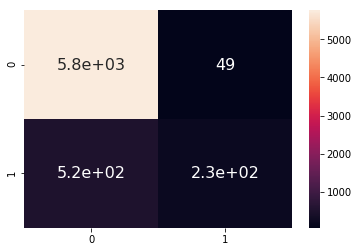

food              precision    recall  f1-score   support

          0       0.92      0.99      0.95      5812
          1       0.82      0.30      0.44       742

avg / total       0.91      0.91      0.90      6554

shelter


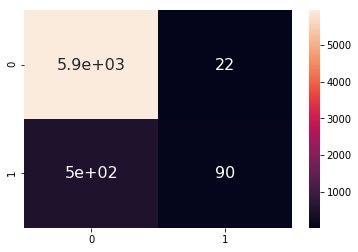

shelter              precision    recall  f1-score   support

          0       0.92      1.00      0.96      5964
          1       0.80      0.15      0.26       590

avg / total       0.91      0.92      0.89      6554

clothing


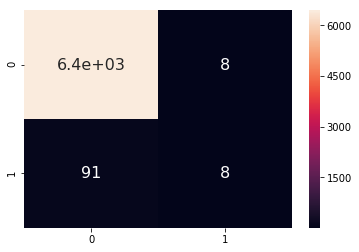

clothing              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6455
          1       0.50      0.08      0.14        99

avg / total       0.98      0.98      0.98      6554

money


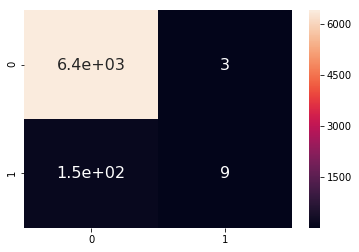

money              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6398
          1       0.75      0.06      0.11       156

avg / total       0.97      0.98      0.97      6554

missing_people


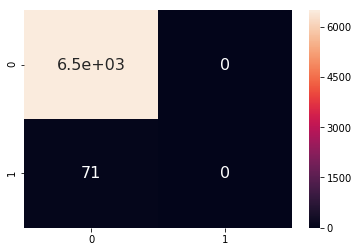

missing_people              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6483
          1       0.00      0.00      0.00        71

avg / total       0.98      0.99      0.98      6554

refugees


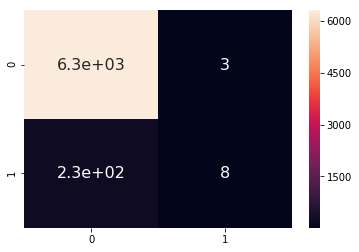

refugees              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6316
          1       0.73      0.03      0.06       238

avg / total       0.96      0.96      0.95      6554

death


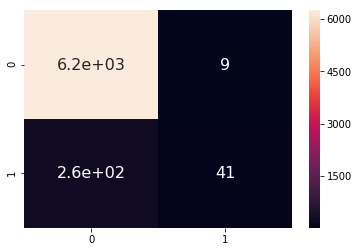

death              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6256
          1       0.82      0.14      0.24       298

avg / total       0.95      0.96      0.95      6554

other_aid


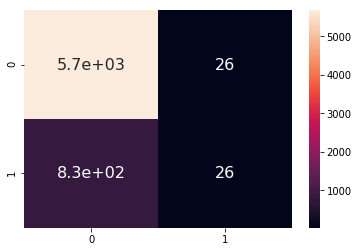

other_aid              precision    recall  f1-score   support

          0       0.87      1.00      0.93      5701
          1       0.50      0.03      0.06       853

avg / total       0.82      0.87      0.82      6554

infrastructure_related


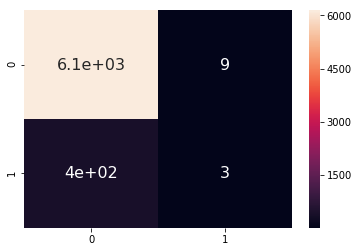

infrastructure_related              precision    recall  f1-score   support

          0       0.94      1.00      0.97      6152
          1       0.25      0.01      0.01       402

avg / total       0.90      0.94      0.91      6554

transport


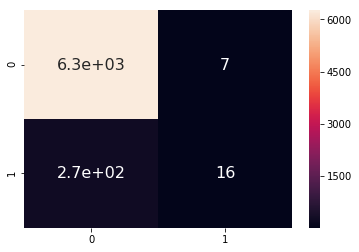

transport              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6265
          1       0.70      0.06      0.10       289

avg / total       0.95      0.96      0.94      6554

buildings


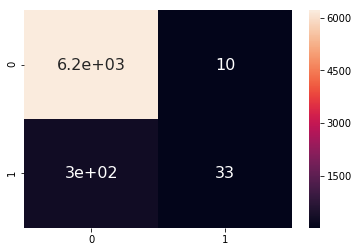

buildings              precision    recall  f1-score   support

          0       0.95      1.00      0.98      6226
          1       0.77      0.10      0.18       328

avg / total       0.95      0.95      0.94      6554

electricity


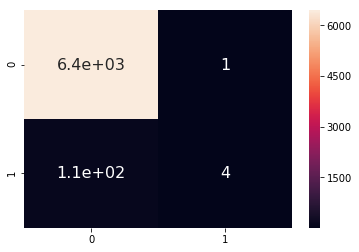

electricity              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6442
          1       0.80      0.04      0.07       112

avg / total       0.98      0.98      0.98      6554

tools


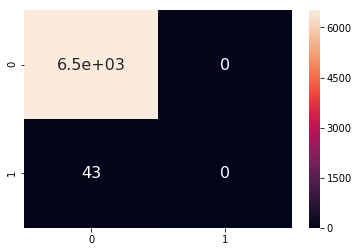

tools              precision    recall  f1-score   support

          0       0.99      1.00      1.00      6511
          1       0.00      0.00      0.00        43

avg / total       0.99      0.99      0.99      6554

hospitals


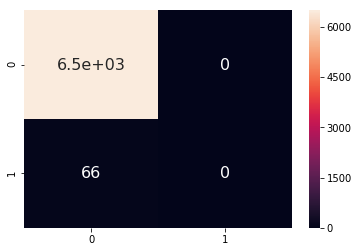

hospitals              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6488
          1       0.00      0.00      0.00        66

avg / total       0.98      0.99      0.98      6554

shops


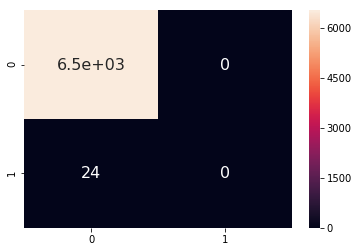

shops              precision    recall  f1-score   support

          0       1.00      1.00      1.00      6530
          1       0.00      0.00      0.00        24

avg / total       0.99      1.00      0.99      6554

aid_centers


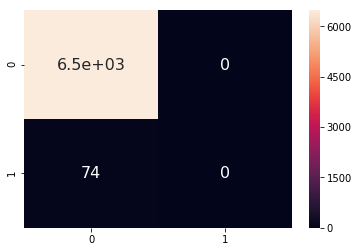

aid_centers              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6480
          1       0.00      0.00      0.00        74

avg / total       0.98      0.99      0.98      6554

other_infrastructure


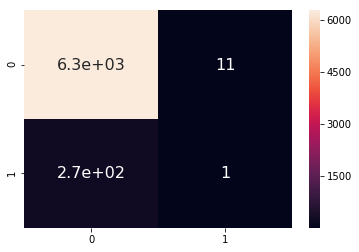

other_infrastructure              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6285
          1       0.08      0.00      0.01       269

avg / total       0.92      0.96      0.94      6554

weather_related


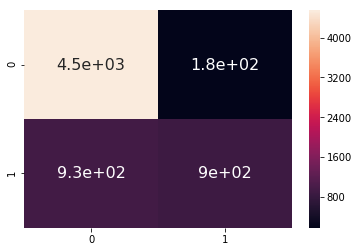

weather_related              precision    recall  f1-score   support

          0       0.83      0.96      0.89      4727
          1       0.83      0.49      0.62      1827

avg / total       0.83      0.83      0.81      6554

floods


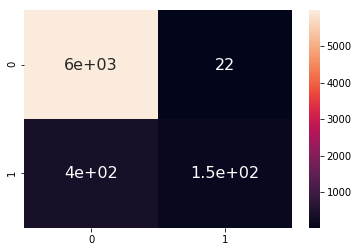

floods              precision    recall  f1-score   support

          0       0.94      1.00      0.97      6002
          1       0.87      0.27      0.41       552

avg / total       0.93      0.94      0.92      6554

storm


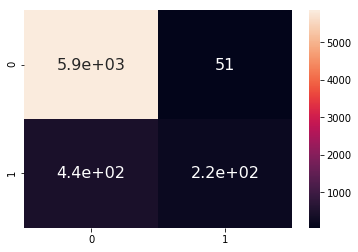

storm              precision    recall  f1-score   support

          0       0.93      0.99      0.96      5902
          1       0.81      0.33      0.47       652

avg / total       0.92      0.93      0.91      6554

fire


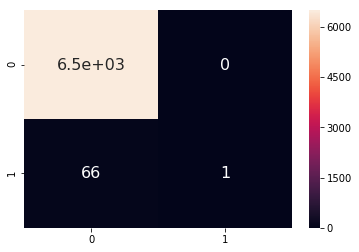

fire              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6487
          1       1.00      0.01      0.03        67

avg / total       0.99      0.99      0.99      6554

earthquake


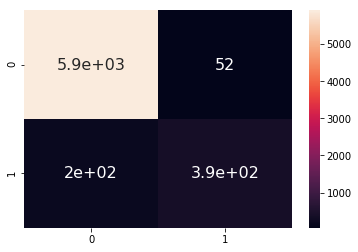

earthquake              precision    recall  f1-score   support

          0       0.97      0.99      0.98      5961
          1       0.88      0.66      0.75       593

avg / total       0.96      0.96      0.96      6554

cold


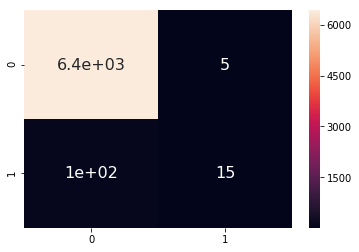

cold              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6435
          1       0.75      0.13      0.22       119

avg / total       0.98      0.98      0.98      6554

other_weather


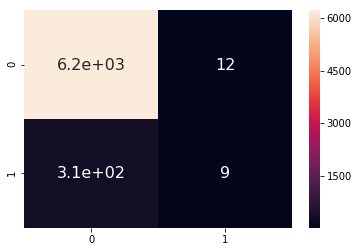

other_weather              precision    recall  f1-score   support

          0       0.95      1.00      0.97      6234
          1       0.43      0.03      0.05       320

avg / total       0.93      0.95      0.93      6554

direct_report


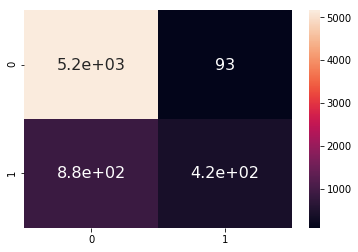

direct_report              precision    recall  f1-score   support

          0       0.85      0.98      0.91      5252
          1       0.82      0.32      0.47      1302

avg / total       0.85      0.85      0.82      6554



In [8]:
def test_model(y_test, y_pred):
    for index, column in enumerate(y_test):
        print(column)
        cf_matrix= confusion_matrix(y_test[column], y_pred[:,index])
        sn.heatmap(cf_matrix, annot=True, annot_kws={"size": 16}) # font size
        plt.show()
        print(column, classification_report(y_test[column], y_pred[:, index]))
test_model(y_test,y_pred)

### 6. Improve your model
Use grid search to find better parameters. 

In [9]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x7f0084e79268>, vocabulary=None)),
  ('ifidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=None,

In [10]:
parameters = {
    'clf__estimator__n_estimators' : [50, 100]
}
cv = GridSearchCV(pipeline, param_grid=parameters)

cv

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__estimator__n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__estimator__n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

related


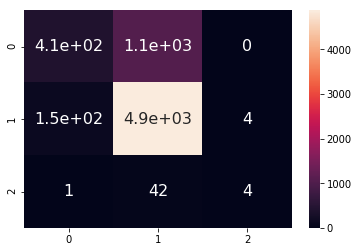

related              precision    recall  f1-score   support

          0       0.74      0.28      0.41      1480
          1       0.81      0.97      0.89      5027
          2       0.50      0.09      0.15        47

avg / total       0.80      0.81      0.77      6554

request


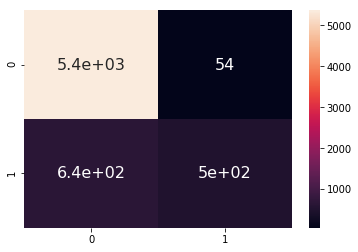

request              precision    recall  f1-score   support

          0       0.89      0.99      0.94      5422
          1       0.90      0.44      0.59      1132

avg / total       0.90      0.89      0.88      6554

offer


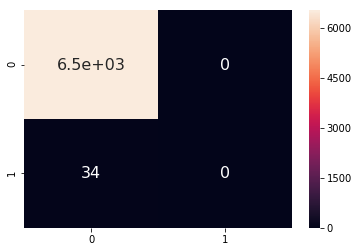

offer              precision    recall  f1-score   support

          0       0.99      1.00      1.00      6520
          1       0.00      0.00      0.00        34

avg / total       0.99      0.99      0.99      6554

aid_related


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


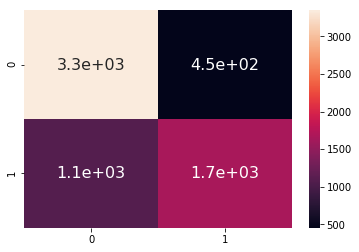

aid_related              precision    recall  f1-score   support

          0       0.75      0.88      0.81      3799
          1       0.79      0.60      0.68      2755

avg / total       0.77      0.76      0.76      6554

medical_help


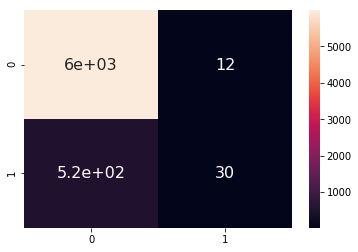

medical_help              precision    recall  f1-score   support

          0       0.92      1.00      0.96      6005
          1       0.71      0.05      0.10       549

avg / total       0.90      0.92      0.89      6554

medical_products


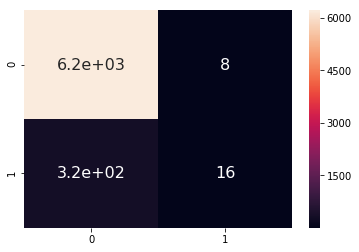

medical_products              precision    recall  f1-score   support

          0       0.95      1.00      0.97      6215
          1       0.67      0.05      0.09       339

avg / total       0.94      0.95      0.93      6554

search_and_rescue


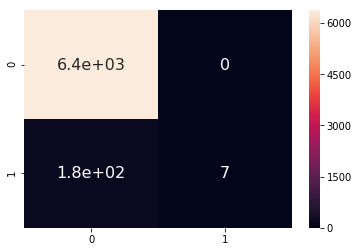

search_and_rescue              precision    recall  f1-score   support

          0       0.97      1.00      0.99      6371
          1       1.00      0.04      0.07       183

avg / total       0.97      0.97      0.96      6554

security


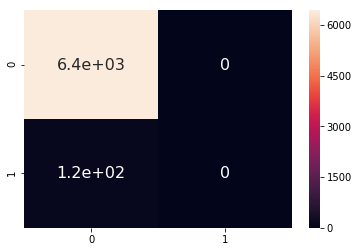

security              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6436
          1       0.00      0.00      0.00       118

avg / total       0.96      0.98      0.97      6554

military


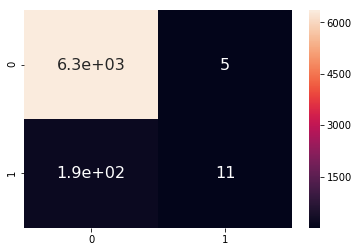

military              precision    recall  f1-score   support

          0       0.97      1.00      0.98      6354
          1       0.69      0.06      0.10       200

avg / total       0.96      0.97      0.96      6554

child_alone


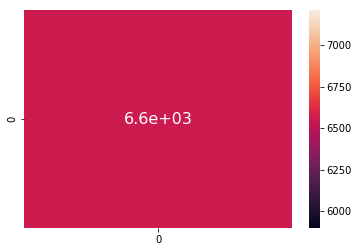

child_alone              precision    recall  f1-score   support

          0       1.00      1.00      1.00      6554

avg / total       1.00      1.00      1.00      6554

water


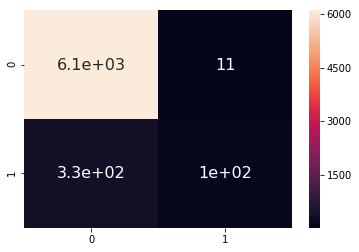

water              precision    recall  f1-score   support

          0       0.95      1.00      0.97      6116
          1       0.90      0.24      0.38       438

avg / total       0.95      0.95      0.93      6554

food


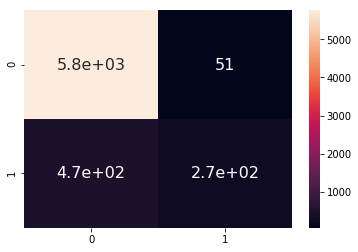

food              precision    recall  f1-score   support

          0       0.92      0.99      0.96      5812
          1       0.84      0.37      0.51       742

avg / total       0.92      0.92      0.91      6554

shelter


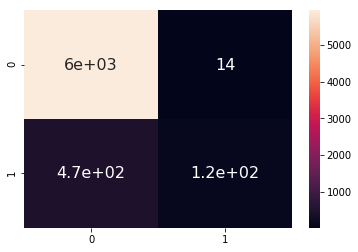

shelter              precision    recall  f1-score   support

          0       0.93      1.00      0.96      5964
          1       0.89      0.20      0.33       590

avg / total       0.92      0.93      0.90      6554

clothing


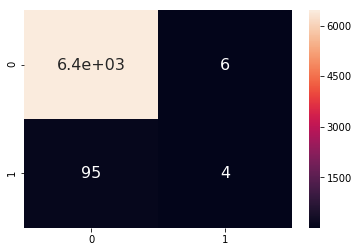

clothing              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6455
          1       0.40      0.04      0.07        99

avg / total       0.98      0.98      0.98      6554

money


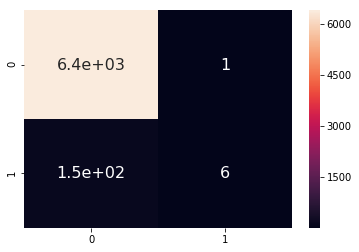

money              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6398
          1       0.86      0.04      0.07       156

avg / total       0.97      0.98      0.97      6554

missing_people


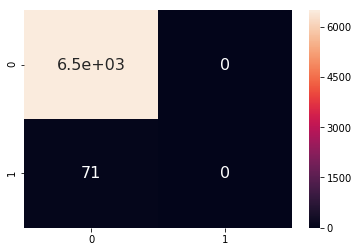

missing_people              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6483
          1       0.00      0.00      0.00        71

avg / total       0.98      0.99      0.98      6554

refugees


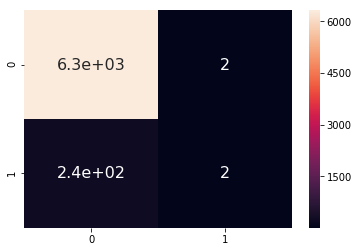

refugees              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6316
          1       0.50      0.01      0.02       238

avg / total       0.95      0.96      0.95      6554

death


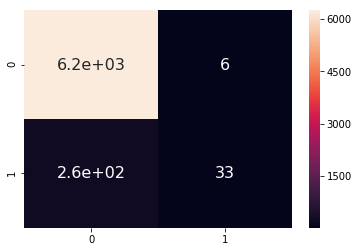

death              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6256
          1       0.85      0.11      0.20       298

avg / total       0.95      0.96      0.94      6554

other_aid


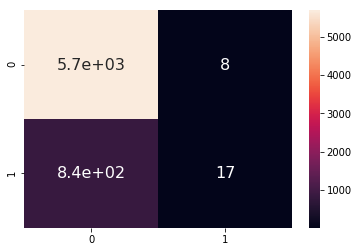

other_aid              precision    recall  f1-score   support

          0       0.87      1.00      0.93      5701
          1       0.68      0.02      0.04       853

avg / total       0.85      0.87      0.81      6554

infrastructure_related


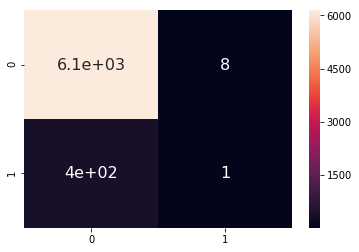

infrastructure_related              precision    recall  f1-score   support

          0       0.94      1.00      0.97      6152
          1       0.11      0.00      0.00       402

avg / total       0.89      0.94      0.91      6554

transport


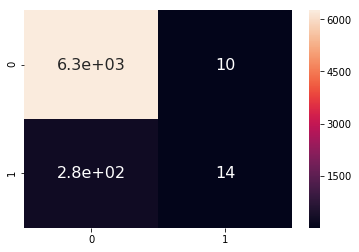

transport              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6265
          1       0.58      0.05      0.09       289

avg / total       0.94      0.96      0.94      6554

buildings


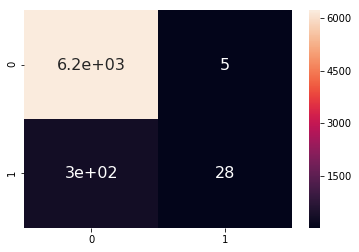

buildings              precision    recall  f1-score   support

          0       0.95      1.00      0.98      6226
          1       0.85      0.09      0.16       328

avg / total       0.95      0.95      0.93      6554

electricity


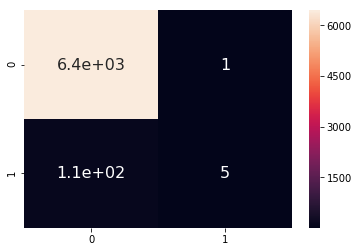

electricity              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6442
          1       0.83      0.04      0.08       112

avg / total       0.98      0.98      0.98      6554

tools


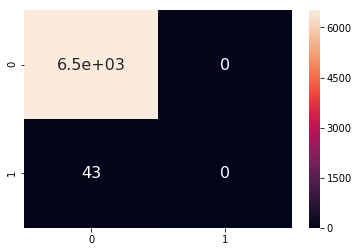

tools              precision    recall  f1-score   support

          0       0.99      1.00      1.00      6511
          1       0.00      0.00      0.00        43

avg / total       0.99      0.99      0.99      6554

hospitals


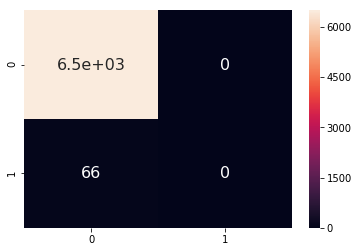

hospitals              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6488
          1       0.00      0.00      0.00        66

avg / total       0.98      0.99      0.98      6554

shops


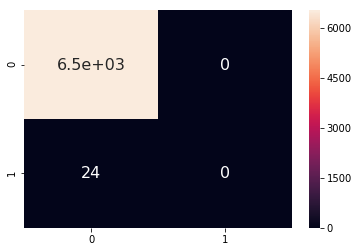

shops              precision    recall  f1-score   support

          0       1.00      1.00      1.00      6530
          1       0.00      0.00      0.00        24

avg / total       0.99      1.00      0.99      6554

aid_centers


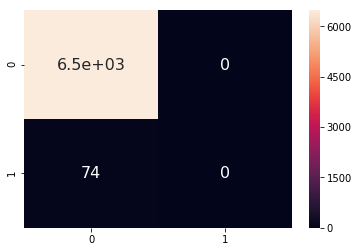

aid_centers              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6480
          1       0.00      0.00      0.00        74

avg / total       0.98      0.99      0.98      6554

other_infrastructure


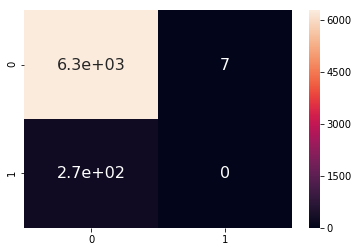

other_infrastructure              precision    recall  f1-score   support

          0       0.96      1.00      0.98      6285
          1       0.00      0.00      0.00       269

avg / total       0.92      0.96      0.94      6554

weather_related


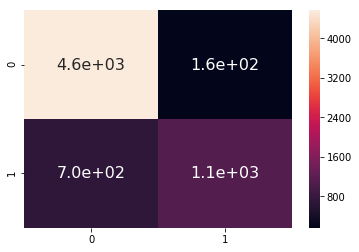

weather_related              precision    recall  f1-score   support

          0       0.87      0.97      0.91      4727
          1       0.87      0.61      0.72      1827

avg / total       0.87      0.87      0.86      6554

floods


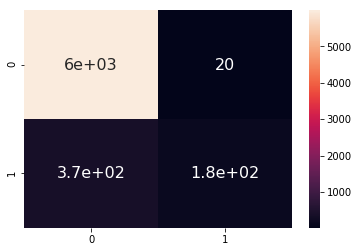

floods              precision    recall  f1-score   support

          0       0.94      1.00      0.97      6002
          1       0.90      0.32      0.47       552

avg / total       0.94      0.94      0.93      6554

storm


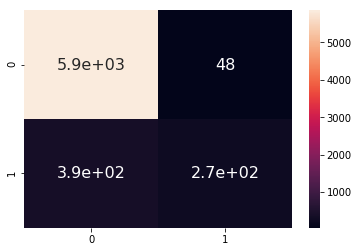

storm              precision    recall  f1-score   support

          0       0.94      0.99      0.96      5902
          1       0.85      0.41      0.55       652

avg / total       0.93      0.93      0.92      6554

fire


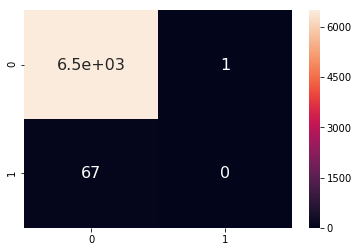

fire              precision    recall  f1-score   support

          0       0.99      1.00      0.99      6487
          1       0.00      0.00      0.00        67

avg / total       0.98      0.99      0.98      6554

earthquake


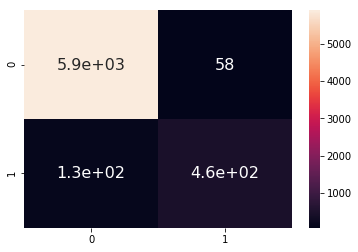

earthquake              precision    recall  f1-score   support

          0       0.98      0.99      0.98      5961
          1       0.89      0.77      0.83       593

avg / total       0.97      0.97      0.97      6554

cold


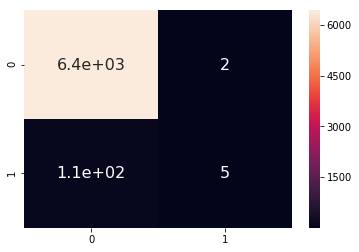

cold              precision    recall  f1-score   support

          0       0.98      1.00      0.99      6435
          1       0.71      0.04      0.08       119

avg / total       0.98      0.98      0.97      6554

other_weather


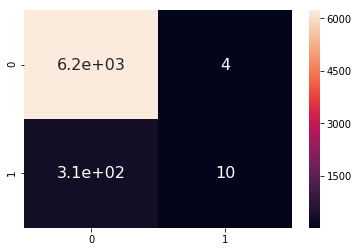

other_weather              precision    recall  f1-score   support

          0       0.95      1.00      0.98      6234
          1       0.71      0.03      0.06       320

avg / total       0.94      0.95      0.93      6554

direct_report


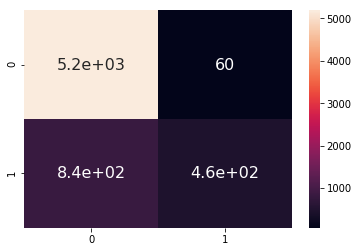

direct_report              precision    recall  f1-score   support

          0       0.86      0.99      0.92      5252
          1       0.89      0.36      0.51      1302

avg / total       0.87      0.86      0.84      6554



In [12]:
y_pred = cv.predict(X_test)
test_model(y_test,y_pred)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [13]:
accuracy = (y_pred == y_test).mean()
accuracy

related                   0.807904
request                   0.894568
offer                     0.994812
aid_related               0.764266
medical_help              0.918981
medical_products          0.949496
search_and_rescue         0.973146
security                  0.981996
military                  0.970400
child_alone               1.000000
water                     0.947360
food                      0.920507
shelter                   0.925847
clothing                  0.984590
money                     0.976961
missing_people            0.989167
refugees                  0.963686
death                     0.958651
other_aid                 0.871224
infrastructure_related    0.937595
transport                 0.956515
buildings                 0.953464
electricity               0.983522
tools                     0.993439
hospitals                 0.989930
shops                     0.996338
aid_centers               0.988709
other_infrastructure      0.957888
weather_related     

### 9. Export your model as a pickle file

In [14]:
import pickle
filename = 'model.pkl'
pickle.dump(cv, open(filename, 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.